## Assessment Cover Page

***

### Student Full Name: Ilia Grishkin
### Student Number: 2024139
### Module Title: Statistical Techniques for Data Analysis
### Assessment Title: CA2
### Assessment Due Date: 19th-May-2024
### Date of Submission: 18th-May-2024

***

<div style="border: 1px solid black; padding: 10px;">

**Declaration**

By submitting this assessment, I confirm that I have read the CCT policy on academic misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. 
I declare it to be my own work and that all material from third parties has been appropriately referenced.
 I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>

***

# Content 

- [Libraries](#section1)
- [Theory review](#section2)
    - [Z-test](#section2.1)
    - [T-test](#section2.2)
    - [Metrics for testing](#section2.3)
    - [Alpha](#section2.4)
    - [Critical value](#section2.5)
- [**Task 1** (Students performance)](#section3)
    - [EDA](#section3.1)
    - [Destitution](#section3.2)
    - [Hypothesis](#section3.3)
    - [Defining metrics](#section3.4)
    - [Defining testing type](#section3.5)
    - [Approach 1: Manual calculation](#section3.6)
    - [Approach 2: Calculation using Scipy library](#section3.7)
    - [Approach 3: Testing using visualisation tools](#section3.8)
    - [Conclusion](#section3.9)
- [**Task 2** (Diamonds)](#section4)
    - [EDA](#section4.1)
    - [Data Preparation](#section4.2)
    - [Associations between colour and clarity](#section4.3)
        - [Hypotesis](#section4.3.1)
        - [Manual calculation Using Chi-Squared test](#section4.3.2)
            - [Calculation Frequency Table](#section4.3.2.1)
            - [Calculation Expected Frequencies](#section4.3.2.2)
            - [Calculation of the Chi-Squared Statistic](#section4.3.2.3)
        - [Calculating using Python libraries](#section4.3.3)
            - [Chi-squared test](#section4.3.3.1)
            - [ANOVA](#section4.3.3.2)
            - [Tukey Kramer](#section4.3.3.3)
    - [Confidence intervals](#section4.4)
        - [Confidence intervals visualisation](#section4.4.1)
- [**Task 3** (PlantGrowth)](#section5)
    - [EDA](#section5.1)
    - [One-way ANOVA](#section5.2)
    - [Tukey's HSD test](#section5.3)
    - [Conclusion](#section5.4)
- [**Task 4** (Trees)](#section6)
    - [Pearson's correlation review](#section6.1)
    - [Correlations](#section6.2)
        - [Calculation Pearson's correlation coefficient](#section6.2.1)
        - [Scatter plot](#section6.2.2)
        - [Heat map](#section6.2.3)
    - [Models testing](#section6.3)
        - [Models and hyperparametres](#section6.3.1)
        - [Fit Models](#section6.3.2)
        - [Evaluation](#section6.3.3)
        - [Conclusion](#section6.3.4)
- [References](#section7)
- [Author](#section34)
***

<a id="section1"></a>
# Libraries

In [1]:
# General
from pydataset import data
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")

# Visuals 
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots


# Metrics
from sklearn import metrics    
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparation
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV 

# Testing
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

<a id="section2"></a>
# Theory review
***

Z-test and T-test are commonly used approaches for Hypothesis testing. It was reviewed and explained by many different authors such as Sprinthall, R. (2011), John P. and Melvin L. (2006), Derrick, B. Toher, D. White, P. (2017).

<div style="text-align: left;">

<a id="section2.1"></a>
## Z-test
***

The Z-test is used if the sample size is large enough ( n > 30 ) or the sample is normally distributed and the standard deviation is known.

#### Hypotheses
- **Null Hypothesis (H₀)**: The population mean equals the hypothesized value.
  
  <div style="display: inline-block;">
  $$
  H_0: \mu = \mu_0
  $$
  </div>

- **Alternative Hypothesis (H₁)**: The population mean is not equal to the hypothesized value.
  
  <div style="display: inline-block;">
  $$H_1: \mu \neq \mu_0$$
  </div>

#### Types of test

  - Two-tailed test
      <div style="display: inline-block;">
      $$H_1: \mu \neq \mu_0$$
      </div>


  - Left-tailed test
      <div style="display: inline-block;">
      $$H_1: \mu < \mu_0$$
      </div>


  - Right-tailed test
      <div style="display: inline-block;">
      $$H_1: \mu >\mu_0$$
      </div>

  
#### Test Statistic
The Z-test statistic is calculated using the formula:

<div style="display: inline-block;">
$$
Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
$$
</div>
    
where:

- **X** is the sample mean

- **mu** is the hypothesized population mean

- **sigma** is the population standard deviation

- **n** is the sample size

  

</div>


<div style="text-align: left;">

<a id="section2.2"></a>
## T-test
***

The T-test is used when the sample size is small (n<30) and the population variance is unknown.

#### Hypotheses
- **Null Hypothesis (H₀)**: The population mean equals the hypothesized value.
  
  <div style="display: inline-block;">
  $$
  H_0: \mu = \mu_0
  $$
  </div>
- **Alternative Hypothesis (H₁)**: The population mean is not equal to the hypothesized value.
  
  <div style="display: inline-block;">
  $$
  H_1: \mu \neq \mu_0
  $$
  </div>
#### Test Statistic
The T-test statistic is calculated using the formula:
<div style="display: inline-block;">
    
$$
t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}}
$$

</div>


where:
- **X** is the sample mean
- **mu** is the hypothesized population mean
- **s** is the sample standard deviation
- **n** is the sample size

**Comment:**

Both tests serve the same purpose which is the evaluation Null Hypothesis. However, there are a few conditions for applying each test. So, we need to make sure that we have all the metrics we need to complete the test. Additionally, important to understand which tail-type test we use.

</div>

<div style="text-align: left;">

<a id="section2.3"></a>

## Calculating metrics for the Testing
***
### **Sample Mean**

The sample mean (X) is calculated as a summation of all values and dividing the sum by the number of records.

<div style="display: inline-block;">
    
$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$</p>

</div>

where:
- **n** is the sample size
- **X_i** represents each individual sample value

### **Population Mean**

The population mean (mu) is calculated identically to a sample mean, however, the number of records may be significantly larger.

<div style="display: inline-block;">
    
$$ \mu = \frac{1}{N} \sum_{i=1}^{N} X_i $$

</div>

where:
- **N** is the population size
- **X_i** represents each individual population value

### **Alpha**

Alpha is a predefined level of significance.

Commonly used values:
- **alpha = 0.05** (5% significance level)
- **alpha = 0.01**(1% significance level)

### **Critical Value**

The critical value depends on the type of test (Z-test or T-test), the significance level (**alpha**), and whether the test is one-tailed or two-tailed. The mentioned values help to define a critical value in the Z-table or T-table

### **Population Standard Deviation**

The population standard deviation (**sigma**) is calculated as the square root of the variance of the population. It shows how data is distributed 

<div style="display: inline-block;">
    
$$ \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2} $$

</div>

where:
- **N** is the population size
- **X_i** represents each individual population value
- **mu** is the population mean

### **Sample Standard Deviation**

The sample standard deviation (**s**) is calculated as the square root of the sample variance.

<div style="display: inline-block;">
    
$$ s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2} $$

</div>

where:
- **n** is the sample size
- **x_i** represents each individual sample value
- **x** is the sample mean

### **Sample Size**

The sample size (**n**) is the number of records in the sample dataset.

### **Degree of Freedom**

The degrees of freedom (**df**) for a T-test are calculated differently depending on the type of T-test

</div>


<a id="section2.4"></a>

## Alpha
***
The alpha value defines if the Null Hypothesis has to be rejected or not. The commonly used value is 0.05 which means that the hypothesis is applied to 95% of the sample. Each industry or science field defines its alpha. For example, in industries dealing with large datasets where many variables and noises such as betting, sales or retail, alpha should be strict. However, for industries such as physics, medicine, and chemistry alpha may be very small like (0.001) which means for 1000 observations alternative hypothesis must be approved 999 times.

<div style="text-align: left;">

<a id="section2.5"></a>
## Critical Values
***
Critical values are predefined values which help to evaluate the hypothesis and make a decision to reject the Null hypothesis or not.

### Critical Values for Z-test

Critical value can be found in the z-table, where different z-scores depend on significance value (Alpha). Another approach is to use a **scipy.stats** library with package  **norm**

Depending on the test type (One or Two-tailed) critical value may vary. For example:

- One-tailed test with **alpha = 00.5** the critical value is 1.645.
  
- Two-tailed test with **alpha = 00.5** the critical value is ±1.96.



### Critical Values for T-test

Similarly with Z-test, the critical value is defined by alpha using a T-table. However, there is an additional metric to define critical value for p-value such as degree of freedom (**df**). This value also can be retrieved using the same library **scipy.stats** but the package **t**

### Degrees of Freedom for T-test

The degrees of freedom (**df**) are used to slightly reduce a sample size. Natural data has some randomness. So, by excluding one observation we reduce the chances that an unrelated factor makes an impact on testing:

1. **One-sample T-test**:

   <div style="display: inline-block;">
        
   $$ df = n - 1 $$

   </div>
   
   Where **n** is the sample size.

3. **Independent two-sample T-test**:

   <div style="display: inline-block;">
   
   $$ df = n_1 + n_2 - 2 $$

   </div>
   
   Where **n_1** and **n_2** are the sample sizes of the two groups being compared.

5. **Paired (or dependent) two-sample T-test**:

   <div style="display: inline-block;">
   
   $$ df = n - 1 $$

   </div>
   
   Where **n** is the sample size of the paired observations.

</div>

<a id="section3"></a>

# Task 1 (Students' performance)
***

In this task, we are given a task to approve or reject teachers' suspicions about their students' exam scores. 

We have been provided with a dataset of 50 exam results. 

<a id="section3.1"></a>
## EDA
***

In [175]:
df = pd.read_csv("Q1.csv")

In [176]:
df.head(5)

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [177]:
df.shape

(50, 1)

In [178]:
df.dtypes

exam_score    float64
dtype: object

In [179]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


In [180]:
missing = df[df.isnull().any(axis=1)]
print(missing)

Empty DataFrame
Columns: [exam_score]
Index: []


<a id="section3.2"></a>
## Distribution
***

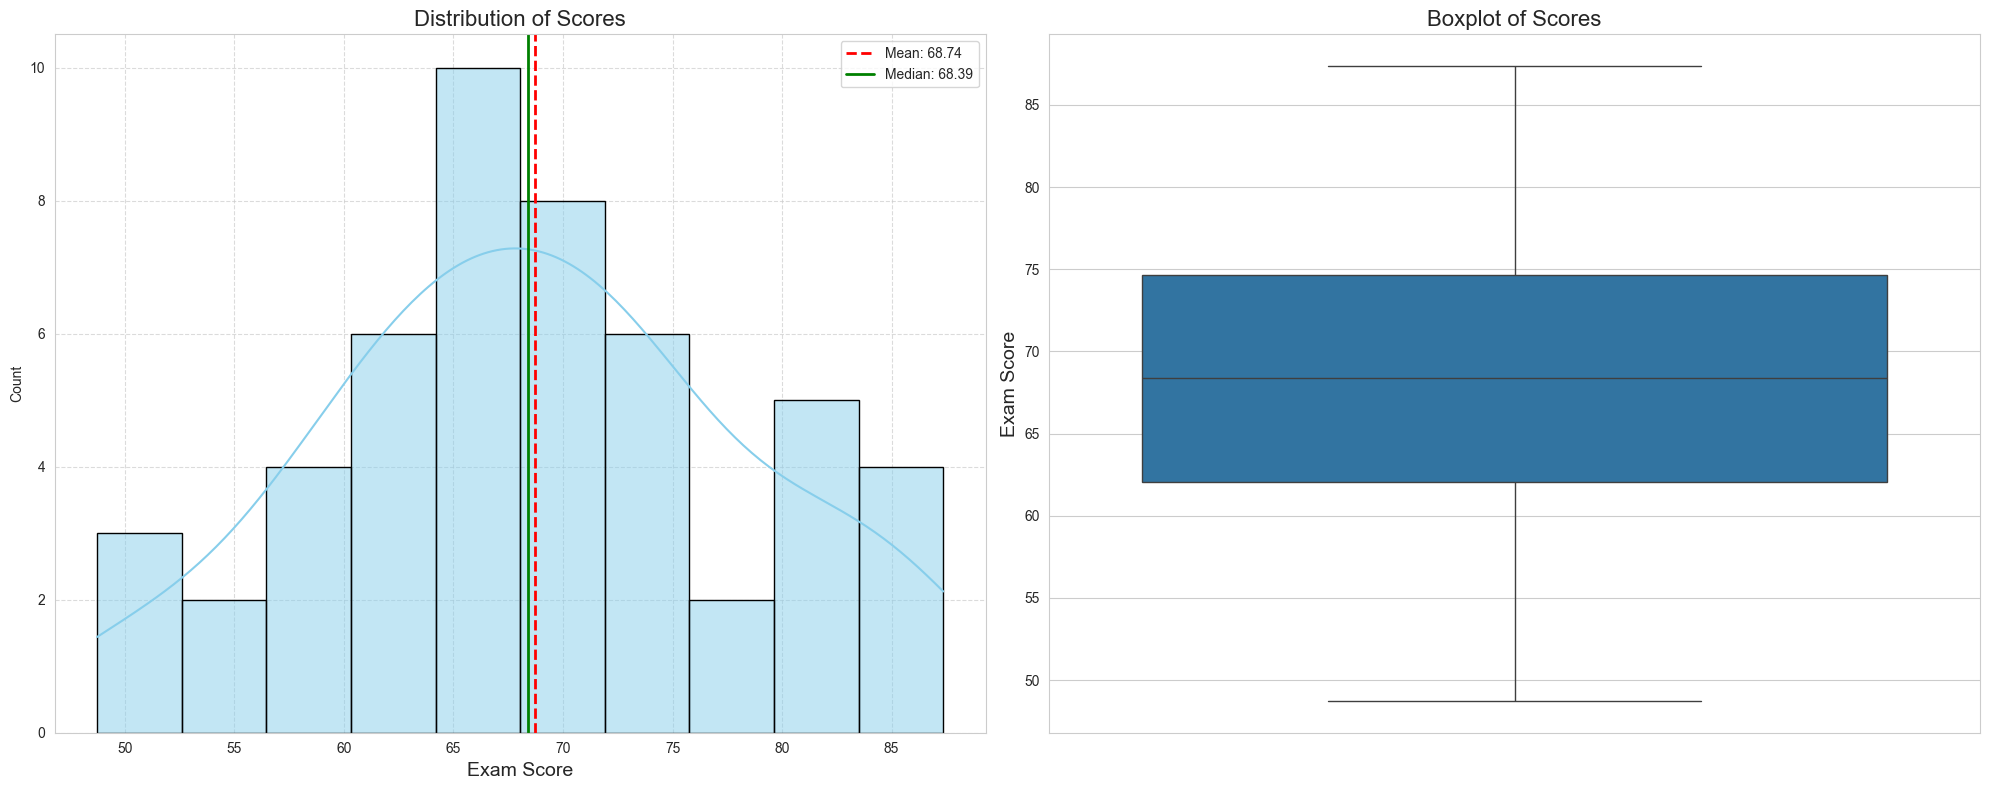

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(df['exam_score'], bins=10, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
mean = df['exam_score'].mean()
median = df['exam_score'].median()
axes[0].axvline(mean, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
axes[0].axvline(median, color='g', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
axes[0].set_title('Distribution of Scores', fontsize=16)
axes[0].set_xlabel('Exam Score', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend()

sns.boxplot(y=df['exam_score'], ax=axes[1])
axes[1].set_title('Boxplot of Scores', fontsize=16)
axes[1].set_ylabel('Exam Score', fontsize=14)

plt.tight_layout()
plt.show()

<a id="section3.3"></a>
### Forming Hypothesis 
***

In this case, the 50 students' dataset is a sample from the population of all students in the same conditions.
The teacher's request can be formed as: "How accurately does the mean of the given dataset represent the population's mean value". 

- **Null Hypothesis (H₀)**: There are no significant deviations for concluding that the sample does not represent the population. The sample's mean equals the population's mean.

  <div style="display: inline-block;">
      
  $$
  H_0: \mu = 70
  $$

  </div>
  
- **Alternative Hypothesis (H₁)**: The sample's mean is significantly lower than the population's. Approving this hypothesis means that we should reject the Null Hypothesis.

  <div style="display: inline-block;">
      
  $$
  H_1: \mu < 70
  $$

  </div>

<a id="section3.4"></a>

## Define metrics
***

**Sample mean**

<div style="display: inline-block;">
    
$$ \bar{x} = \frac{74.54+66,20+86,75...n} {50} = 68.7356$$

</div>

**Population mean**

<div style="display: inline-block;">
    
$$ \mu = 70 $$

</div>

**Alpha**

<div style="display: inline-block;">
    
$$ \alpha = 0.05 $$

</div>

**Critical value**

Unknown yet, requires test-type.

**Population standard deviation**

Not given.

**Sample standard deviation**

<div style="display: inline-block;">

$$ s = \sqrt{\frac{1}{50-1} * ((74.54-68.7356)+(66,20-68.7356)+(86,75-68.7356)...(n-68.7356))^2} $$

$$ s = 9.7501 $$

</div>

**Sample size**

<div style="display: inline-block;">
    
$$ n = 50 $$ 

</div>

**Degree of freedom**

<div style="display: inline-block;">
    
$$ df = 50 - 1 $$

</div>

<a id="section3.5"></a>

## Difine Test Type
***

Our sample is big enough to make a Z-test however we are missing a population's standard deviation. That is why in this case we are going to do a **T-test**.

Another parameter we need to define is the test tail-type based on the hypothesis we formed. It is going to be a **one/left-tail type**.

Now we can define critical value. According to the T-table for datasets with (**df = 49**) and (**alpha = 0.05**) **critical value is 1.677**

<a id="section3.6"></a>
## Manual Calculation 
***

To calculate the t-value we need to impute values we prepared into a T-test equation:

<div style="display: inline-block;">
    
$$t = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} = \frac{{68.7356} - 70}{9.7501 / \sqrt{50}}  = \frac{- 1.2644}{9.7501 / 7.071} = \frac{- 1.2644}{1.3788} \approx -0.917$$

</div>

**T-value = -0.917**

**Critical value = - 1.677**

**P-value = 0.1829**

**-0.917 > - 1.677** -> T-value greater that Critical Value -> **Rejection the null hypothesis has failed**

<a id="section3.7"></a>

## Calculating using Scipy library
***

In [186]:
# Metrics
sample_mean = df['exam_score'].mean()
population_mean = 70
sample_size = len(df)
sample_std = df['exam_score'].std()
alpha = 0.05

# T-value
t_statistic = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))

# Critical value
df_degrees_of_freedom = sample_size - 1
critical_value = stats.t.ppf(alpha, df_degrees_of_freedom)

# P-value
p_value = stats.t.cdf(t_statistic, df_degrees_of_freedom)

# Calculated metrix
print(f"Sample Mean: {sample_mean}")
print(f"Population Mean: {population_mean}")
print(f"Sample Size: {sample_size}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"T-statistic: {t_statistic}")
print(f"Critical Value: {critical_value}")
print(f"P-value: {p_value}")

# Conclusion
if t_statistic <= critical_value:
    print("Reject the null hypothesis.")
else:
    print("Rejection the null hypothesis has failed")


Sample Mean: 68.73559999999999
Population Mean: 70
Sample Size: 50
Sample Standard Deviation: 9.75014288958613
T-statistic: -0.9169771399834615
Critical Value: -1.6765508926168542
P-value: 0.18182298516031403
Rejection the null hypothesis has failed


<a id="section3.8"></a>

## Calculating T-test using visual tools
***

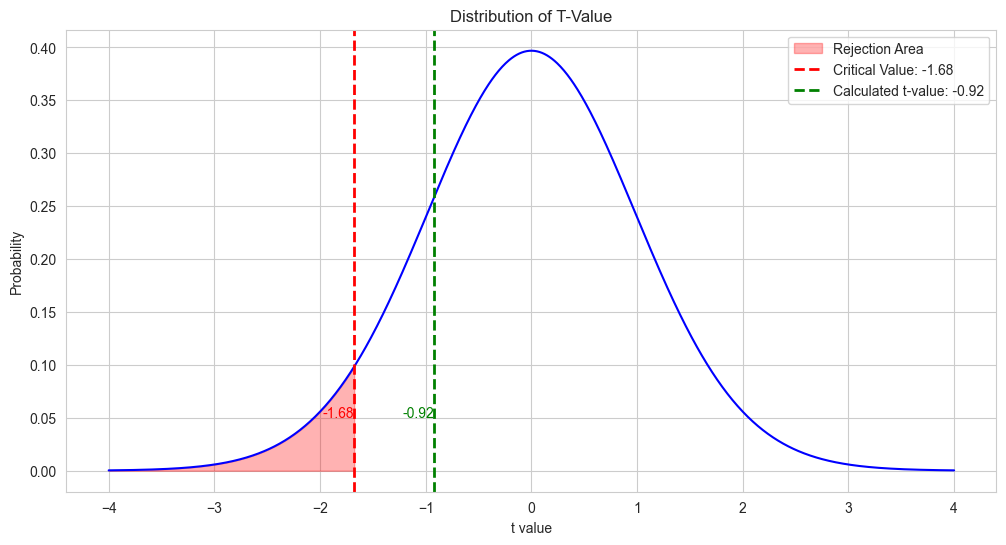

In [187]:
# Metrics
sample_mean = df['exam_score'].mean()
population_mean = 70
sample_size = len(df)
sample_std = df['exam_score'].std()
alpha = 0.05

# Calculate the t-value
t_value = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Degree of freedom
fredom_degree = sample_size - 1

# Critical value
critical_value = stats.t.ppf(alpha, fredom_degree)

# Generate values for the t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, degrees_of_freedom)

# Create the plot
plt.figure(figsize=(12, 6))

# T-distribution
sns.lineplot(x=x, y=y, color='blue')

# Rejection area
x_fill = np.linspace(-4, critical_value, 100)
y_fill = stats.t.pdf(x_fill, fredom_degree)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label='Rejection Area')

plt.axvline(critical_value, color='red', linestyle='--', linewidth=2, label=f'Critical Value: {critical_value:.2f}')
plt.axvline(t_statistic, color='green', linestyle='--', linewidth=2, label=f'Calculated t-value: {t_value:.2f}')

plt.text(t_value, 0.05, f'{t_statistic:.2f}', horizontalalignment='right', color='green')
plt.text(critical_value, 0.05, f'{critical_value:.2f}', horizontalalignment='right', color='red')

plt.title('Distribution of T-Value')
plt.xlabel('t value')
plt.ylabel('Probability')
plt.legend()

plt.grid(True)
plt.show()


<a id="section3.9"></a>

## Conclusion
***

Based on the data, statistical metrics and significance level provided we can conclude that there is not enough evidence to reject the Null Hypothesis. In other words, students' performance is not significantly lower than the average national score.

<a id="section4"></a>

# Task 2 (Diamonds' clarity)
***

In this task, we need to test if there is any association between the two characteristics of diamonds.

We can perform a dependent two-sample test for proportions. We will compare the proportions of one variable across the levels of the other variable.

<a id="section4.1"></a>

## EDA
***

In [188]:
df = sns.load_dataset('diamonds')
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [189]:
print(sorted(df['color'].unique()))
print(sorted(df['clarity'].unique()))

['D', 'E', 'F', 'G', 'H', 'I', 'J']
['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


In [190]:
missing = df[df.isnull().any(axis=1)]
print(missing)

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [191]:
df.shape

(53940, 10)

In [192]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<a id="section4.2"></a>

## Data Preparation
***

In [193]:
colourless_values = []

for index, row in df.iterrows():
    if 'D' in row.values or 'E' in row.values or 'F' in row.values:
        colourless_values.append(1)
    else:
        colourless_values.append(0)

df['colourless'] = colourless_values

print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   colourless  
0           1  
1           1  
2           1  
3           0  
4           0  


<a id="section4.3"></a>

## Associations between colour and clarity
***

<a id="section4.3.1"></a>
### Hypothesis
***

- **Null Hypothesis (H₀)**: There are no significant associations between diamonds colourless and clarity.

  **Chi-value lower than Critical value**

- **Alternative Hypothesis (H₁)**: There are no significant associations between diamonds' colourless and clarity.
  
  **Chi-value greater than Critical value**

<a id="section4.3.2"></a>
### Manual calculation Using Chi-Squared test
***

For applying a Chi-Squared test we will follow the explanations and comments of authors  Nikulin, M. (1996) and Fisher, R. (1922).

<a id="section4.3.2.1"></a>

#### Calculate frequency table
***

In this stage, we must determine how frequently each combination of two selected features occurs in the dataset.
However, manual counting can be quite time-consuming because we have 53940 records. We can use **cross-tabulation** function which comes with pandas library to calculate combinations for us.

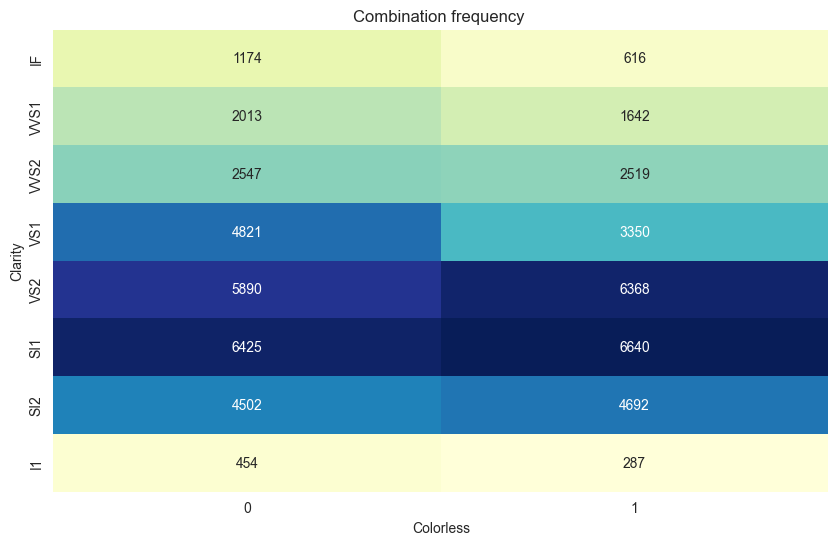

In [194]:
cross_tab = pd.crosstab(df['clarity'], df['colourless'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Colorless')
plt.ylabel('Clarity')
plt.title('Combination frequency ')
plt.show()

In [195]:
cross_tab['Total'] = cross_tab.sum(axis=1)
total_row = cross_tab.sum(axis=0)
total_row.name = 'Total'
cross_tab = pd.concat([cross_tab, total_row.to_frame().T])
print(cross_tab)

colourless      0      1  Total
IF           1174    616   1790
VVS1         2013   1642   3655
VVS2         2547   2519   5066
VS1          4821   3350   8171
VS2          5890   6368  12258
SI1          6425   6640  13065
SI2          4502   4692   9194
I1            454    287    741
Total       27826  26114  53940


<a id="section4.3.2.2"></a>

#### Calculate Expected Frequencies
***

<div style="display: inline-block;">
$$ E_{ij} = \frac{(R_i \times C_j)}{N} $$

Where:
- **R_i** is the total for row **i**
- **C_j** is the total for column **j**
- **N** is the total number of observations

***

- Expected frequency for cell (IF (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ E_{(IF,0)} = \frac{(1790 \times 27826)}{53940} \approx 923.4 $$

</div>

- Expected frequency for cell (IF (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ E_{IF,1} = \frac{(1790 \times 26114)}{53940} \approx 866.5 $$

</div>

- Expected frequency for cell (VVS1 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ E_{VVS1,0} = \frac{(3655 \times 27826)}{53940} \approx 1885.5 $$

</div>
  
- Expected frequency for cell (VVS1 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ E_{VVS1,1} = \frac{(3655 \times 26114)}{53940} \approx 1769.4 $$

</div>

- Expected frequency for cell (VVS2  (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ E_{VVS2,0} = \frac{(5066 \times 27826)}{53940} \approx 2613.3 $$

</div>
  
- Expected frequency for cell (VVS2  (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ E_{VVS2,1} = \frac{(5066 \times 26114)}{53940} \approx 2452.6 $$

</div>

- Expected frequency for cell (VS1 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ E_{VS1,0} = \frac{(8171 \times 27826)}{53940} \approx 4215.1 $$

</div>
  
- Expected frequency for cell (VS1 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ E_{VS1,1} = \frac{(8171 \times 26114)}{53940} \approx 3955.8 $$

</div>

- Expected frequency for cell (VS2 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ E_{VS2,0} = \frac{(12258 \times 27826)}{53940} \approx 6323.5 $$

</div>
  
- Expected frequency for cell (VS2 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ E_{VS2,1} = \frac{(12258 \times 26114)}{53940} \approx 5934.4 $$

</div>

- Expected frequency for cell (SI1 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ E_{SI1,0} = \frac{(13065 \times 27826)}{53940} \approx 6739.8 $$

</div>
  
- Expected frequency for cell (SI1 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ E_{SI1,1} = \frac{(13065 \times 26114)}{53940} \approx 6325.1 $$

</div>

- Expected frequency for cell (SI2 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ E_{SI2,0} = \frac{(9194 \times 27826)}{53940} \approx 4742.9 $$

</div>
  
- Expected frequency for cell (SI2 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ E_{SI2,1} = \frac{(9194 \times 26114)}{53940} \approx 4451 $$

</div>

- Expected frequency for cell (I1 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ E_{I1,0} = \frac{(741 \times 27826)}{53940} \approx 382.2 $$

</div>
  
- Expected frequency for cell (I1 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ E_{I1,1} = \frac{(741 \times 26114)}{53940} \approx 358.7 $$

</div>

  ***

<div style="display: inline-block;">

**Updated frequency table**

|  Clarity     | 0 "Not Colourless" (Expected freq.)  | 1 "Colourless"  (Expected freq.)   | Total |
|------------|-------------|-------------|-------|
| **IF**      | **1174 (923.4)**| **616 (866.5)** | 1790   |
| **VVS1**      | **2013 (1885.5)**| **1642 (1769.4)**  | 3655   |
| **VVS2**      | **2547 (2613.3)**| **2519 (2453.6)**| 5066  |
| **VS1**      | **4821 (4215.1)**| **3350 (3955.8)**| 8171  |
| **VS2**      | **5890 (6323.5)**| **6368 (5934.4)** | 12258  |
| **SI1**      | **6425 (6739.8)**| **6640 (6325.1)** | 13065  |
| **SI2**      | **4502 (4742.9)** | **4692 (4451)** | 9194  |
| **I1**      | **454 (382.2)**| **287 (358.7)**| 741  |
| **Total**  | 27826         | 26114           | 53940  |

</div>

***

<a id="section4.3.2.3"></a>

#### Calculate the Chi-Squared Statistic
***

<div style="display: inline-block;">

$$ \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} $$

</div>

Where:

**O_ij** - is the observed frequency 

**E_ij** -  is the expected frequency.

***

- Chi-Squared for cell (IF (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(IF,0)} = \frac{(1174 - 923.4)^2}{923.4} = 68.75 $$

</div>

- Chi-Squared for cell (IF (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(IF,1)} = \frac{(616 - 866.5)^2}{866.5} = 78.30 $$

</div>

- Chi-Squared for cell (VVS1 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(VVS1,0)} = \frac{(2013 - 1885.5)^2}{1885.5} = 8.79 $$

</div>
  
- Chi-Squared for cell (VVS1 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(VVS1,1)} = \frac{(1642 - 1769.4)^2}{1769.4} = 10.09 $$

</div>

- Chi-Squared for cell (VVS2  (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(VVS2,0)} = \frac{(2547 - 2613.3)^2}{2613.3} = 1.55 $$

</div>
  
- Chi-Squared for cell (VVS2  (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(VVS2,1)} = \frac{(2519 - 2453.6)^2}{2453.6} = 1.67 $$

</div>

- Chi-Squared for cell (VS1 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(VS1,0)} = \frac{(4821 - 4215.1)^2}{4215.1} = 84.69 $$

</div>
  
- Chi-Squared for cell (VS1 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(VS1,1)} = \frac{(3350 - 3955.8)^2}{3955.8} = 91.29 $$

</div>

- Chi-Squared for cell (VS2 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(VS2,0)} = \frac{(5890 - 6323.5)^2}{6323.5} = 28.30 $$

</div>
  
- Chi-Squared for cell (VS2 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(VS2,1)} = \frac{(6368 - 5934.4)^2}{5934.4} = 27.90 $$

</div>

- Chi-Squared for cell (SI1 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(SI1,0)} = \frac{(6425 - 6739.8)^2}{6739.8} = 15.79 $$

</div>
  
- Chi-Squared for cell (SI1 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(SI1,1)} = \frac{(6640 - 6325.1)^2}{6325.1} = 15.74 $$

</div>

- Chi-Squared for cell (SI2 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(SI2,0)} = \frac{(4502 - 4742.9)^2}{4742.9} = 12.29 $$

</div>
  
- Chi-Squared for cell (SI2 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(SI2,1)} = \frac{(4692 - 4451)^2}{4451} = 15.53 $$

</div>

- Chi-Squared for cell (I1 (Clarity cat.)), 0 (Not Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(I1,0)} = \frac{(454 - 382.2)^2}{382.2} = 12.99 $$

</div>
  
- Chi-Squared for cell (I1 (Clarity cat.)), 1 (Colourless)):

<div style="display: inline-block;">

  $$ \chi^2_{(I1,1)} = \frac{(287 - 358.7)^2}{358.7} = 13.57 $$

</div>


***

<div style="display: inline-block;">

$$ \chi^2_{(total)} = 487.24 $$

</div>

***
  
**Degree of freedom**

To calculate **Degree of freedom** in Chi-squared test we need to use the dimensions of the contingency table we created before.

<div style="display: inline-block;">

$$ df=(number of rows−1)×(number of columns−1) $$

$$ df=(R−1)×(C−1)=(8−1)×(2−1)=7×1=7 $$

</div>

***

**Critical value**

Based on the degree of freedom calculated and the significance level (alpha=0.01) provided we can determine the critical value **(18.48)**

***

**Decision**

<div style="display: inline-block;">

$$ \chi^2_{(total)} > critical value $$

$$ 487.24 > 18.48 $$

</div>

**The Null Hypothesis at the 0.01 significance level is rejected.**

There is enough statistical evidence to declare that there is an association between "Clarity" and whether the diamond is colourless or not.

<a id="section4.3.3"></a>

### Calculating using Python libraries
***

<a id="section4.3.3.1"></a>

#### Chi-squared 
***

In [196]:
import pandas as pd
from scipy.stats import chi2_contingency

df = sns.load_dataset('diamonds')

colourless_values = []

for index, row in df.iterrows():
    if 'D' in row.values or 'E' in row.values or 'F' in row.values:
        colourless_values.append(1)
    else:
        colourless_values.append(0)

df['colourless'] = colourless_values

contingency_table = pd.crosstab(df['clarity'], df['colourless'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)
alpha = 0.01

print(f"Chi-squared statistic: {chi2}")
print(f"Significance level: {alpha}")

if p_value < alpha:
    print("Null Hypothesis rejected")
    print("There is a significant association between the colour and clarity")
else:
    print("Rejection of Null Hypothesis has failed")
    print("There is no significant association between the colour and clarity")

Chi-squared statistic: 486.4730594148522
Significance level: 0.01
Null Hypothesis rejected
There is a significant association between the colour and clarity


<a id="section4.3.3.2"></a>
#### ANOVA
***

In [197]:
df = sns.load_dataset('diamonds')

colourless_values = []

for index, row in df.iterrows():
    if 'D' in row.values or 'E' in row.values or 'F' in row.values:
        colourless_values.append(1)
    else:
        colourless_values.append(0)

df['colourless'] = colourless_values

group1 = df[(df.clarity == 'IF')]
group2 = df[(df.clarity == 'VVS1')]
group3 = df[(df.clarity == 'VVS2')]
group4 = df[(df.clarity == 'VS1')]
group5 = df[(df.clarity == 'VS2')]
group6 = df[(df.clarity == 'SI1')]
group7 = df[(df.clarity == 'SI2')]
group8 = df[(df.clarity == 'I1')]

stats.f_oneway(group1['colourless'],
               group2['colourless'],
               group3['colourless'],
               group4['colourless'],
               group5['colourless'],
               group6['colourless'],
               group7['colourless'],
               group8['colourless'])

F_onewayResult(statistic=70.1182250986631, pvalue=2.2286936134194793e-101)

**Comment:**

**F-statistic: 70.118**

A high F-statistic score indicates a greater degree of difference between the group's means relative to the variation within the groups.

**P-value: 2.2286936134194793e-101 (approx.0)**

The calculated p-value is much smaller than the given alpha level of 0.01, we can reject the null hypothesis.

**Conclusion:**

Since the p-value is extremely small, much less than the typical significance level of 0.01:

Reject the Null Hypothesis

Significant Differences Exist: There are significant differences in the proportions of colourless diamonds among the different clarity categories (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1).

<a id="section4.3.3.3"></a>

#### Tukey Kramer 
***

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    I1     IF  -0.0432 0.4908 -0.1198  0.0335  False
    I1    SI1   0.1209    0.0  0.0547  0.1872   True
    I1    SI2    0.123    0.0   0.056    0.19   True
    I1    VS1   0.0227 0.9357 -0.0446    0.09  False
    I1    VS2   0.1322    0.0  0.0658  0.1986   True
    I1   VVS1   0.0619  0.042 -0.0088  0.1326  False
    I1   VVS2   0.1099    0.0  0.0409  0.1789   True
    IF    SI1   0.1641    0.0  0.1199  0.2083   True
    IF    SI2   0.1662    0.0  0.1209  0.2115   True
    IF    VS1   0.0659    0.0  0.0201  0.1116   True
    IF    VS2   0.1754    0.0   0.131  0.2198   True
    IF   VVS1   0.1051    0.0  0.0545  0.1557   True
    IF   VVS2   0.1531    0.0  0.1049  0.2013   True
   SI1    SI2   0.0021    1.0 -0.0218   0.026  False
   SI1    VS1  -0.0982    0.0  -0.123 -0.0735   True
   SI1    VS2   0.0113 0.6192 -0.0108  0.0333 

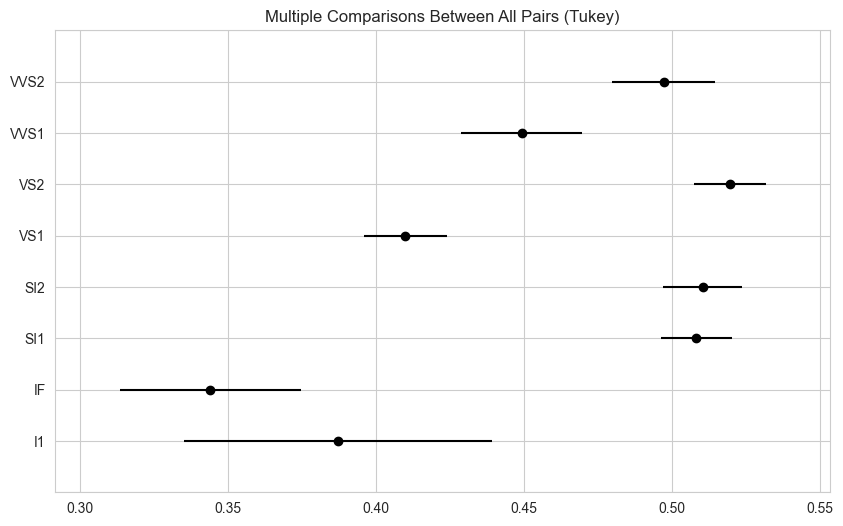

In [198]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

clarity_levels = df['clarity']
colourless_values = df['colourless']

tukey = pairwise_tukeyhsd(endog=colourless_values, 
                          groups=clarity_levels,   
                          alpha=0.01)

print(tukey)
tukey.plot_simultaneous()
plt.show()


**Comment:**

The provided report compares the mean values of different clarity groups of diamonds, giving information about how each group differ based on a proportion of colourless.

**Significant difference**

If the reject column is True, there is a significant difference between the two groups at the significance level of 0.01.

If the reject column is False, there is no significant difference between the two groups.

**Direction of difference**

If meandiff is positive, the first group has a higher proportion of "colourless" diamonds.

If meandiff is negative, the second group has a higher proportion of "colourless" diamonds.

**Confidence intervals**

If the confidence interval (lower to upper) does not include 0, it confirms that the difference is statistically significant.

If the interval includes 0, it indicates that the difference is not statistically significant.



<a id="section4.4"></a>

## Confidence intervals
***

In [199]:
df = sns.load_dataset('diamonds')

colourless_values = []

for index, row in df.iterrows():
    if 'D' in row.values or 'E' in row.values or 'F' in row.values:
        colourless_values.append(1)
    else:
        colourless_values.append(0)

df['colourless'] = colourless_values

colourless = df[df['colourless'] == 1]
non_colourless = df[df['colourless'] == 0]

def confidence_interval(data, confidence=0.90):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

colourless_mean, colourless_ci_lower, colourless_ci_upper = confidence_interval(colourless['price'])
non_colourless_mean, non_colourless_ci_lower, non_colourless_ci_upper = confidence_interval(non_colourless['price'])

print(f"Colourless Diamonds Mean Price: {colourless_mean:.2f}")
print(f"90% Confidence Interval: ({colourless_ci_lower:.2f}, {colourless_ci_upper:.2f})\n")

print(f"Non-Colourless Diamonds Mean Price: {non_colourless_mean:.2f}")
print(f"90% Confidence Interval: ({non_colourless_ci_lower:.2f}, {non_colourless_ci_upper:.2f})")

Colourless Diamonds Mean Price: 3337.76
90% Confidence Interval: (3301.86, 3373.66)

Non-Colourless Diamonds Mean Price: 4491.23
90% Confidence Interval: (4448.78, 4533.68)


**Mean prices:**

Colourless Diamonds Mean Price: 3337.76

Non-Colourless Diamonds Mean Price: 4491.23

This indicates that, on average, non-colourless diamonds are priced higher than colourless diamonds in the dataset.

**Confidence Intervals:**

90% Confidence Interval for Colourless Diamonds: **3301.86 - 3373.66**

90% Confidence Interval for Non-Colourless Diamonds: **4448.78 - 4533.68**

The results mean that we can say with 90% that the mean values of diamonds will be placed within given intervals.

Additionally, we can conclude how colourless affects the price of diamonds.


<a id="section4.4.1"></a>

### Confidence intervals visualisation 
***

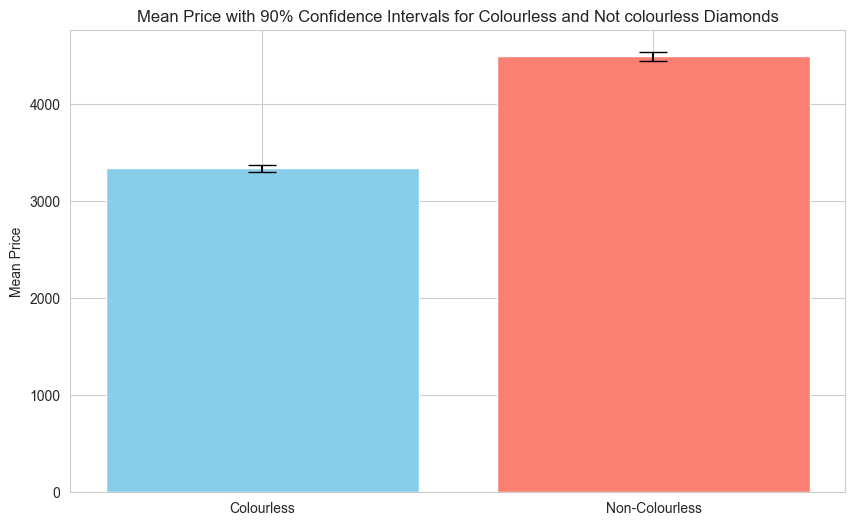

In [200]:
categories = ['Colourless', 'Non-Colourless']
means = [colourless_mean, non_colourless_mean]
ci_lowers = [colourless_mean - colourless_ci_lower, non_colourless_mean - non_colourless_ci_lower]
ci_uppers = [colourless_ci_upper - colourless_mean, non_colourless_ci_upper - non_colourless_mean]

plt.figure(figsize=(10, 6))
plt.bar(categories, means, yerr=[ci_lowers, ci_uppers], capsize=10, color=['skyblue', 'salmon'])
plt.ylabel('Mean Price')
plt.title('Mean Price with 90% Confidence Intervals for Colourless and Not colourless Diamonds')
plt.show()

<a id="section5"></a>

# Task 3 (PlantGrowth)
***

<a id="section5.1"></a>

## EDA
***

In [201]:
df = data("PlantGrowth")
df.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [202]:
summary_stats = df.groupby('group').describe()
print(summary_stats)

      weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


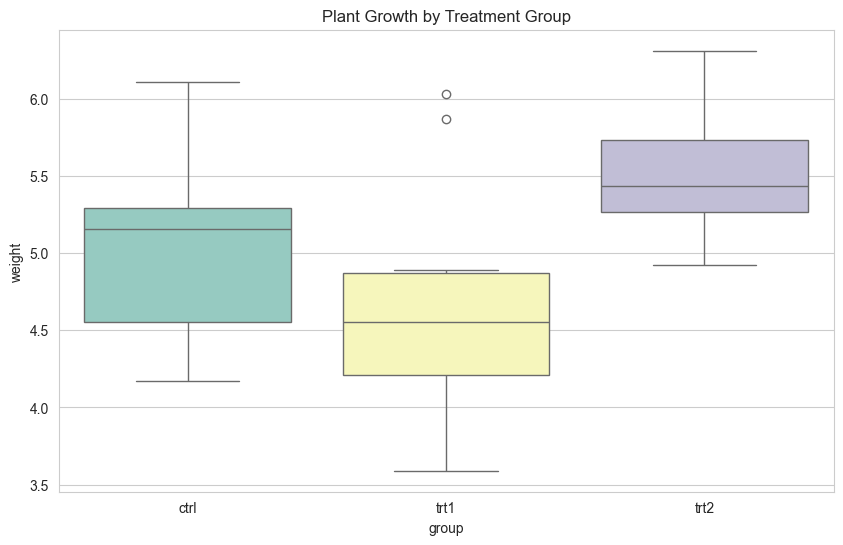

In [203]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='weight', data=df, palette='Set3')
plt.title('Plant Growth by Treatment Group')
plt.show()

<a id="section5.2"></a>

## One-way ANOVA
***

In [204]:
control = df[df['group'] == 'ctrl']['weight']
treatment1 = df[df['group'] == 'trt1']['weight']
treatment2 = df[df['group'] == 'trt2']['weight']

f_stat, p_value = f_oneway(control, treatment1, treatment2)
print(f'ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}')

ANOVA F-statistic: 4.8461, p-value: 0.0159


<a id="section5.3"></a>

## Tukey's HSD test
***

Because ANOVA testing performed significant differences between groups we can test our hypothesis further using Tukey's HSD test.

In [205]:
if p_value < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)
    print(tukey)
else:
    print("No significant differences found between groups.")


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


<a id="section5.4"></a>

## Conclusion
***

Based on the p-value (0.0159) using the ANOVA test and significance level provided (alpha=0.05) we can conclude that the Null Hypotesis is rejected. In other words, there is a significant difference between different treatments.

Results of ANOVA testing justify a more detailed analysis using Tukey testing.
Tukey testing compares the means of each group by using the following metrics:

- **group1, group2**

     The groups being compared.
 
- **meandiff**

     The difference in means between the two groups.
 
- **p-adj**

    The adjusted p-value for the comparison.
- **lower, upper**

    The lower and upper bounds of the 95% confidence interval for the mean difference.
  
- **reject**

     Indicates whether the null hypothesis (that there is no difference between the group means) is rejected.


**(ctrl) vs (trt1)**


|0.05 > 0.3909| -> |Alpha > P-value| -> |T-value greater that Critical Value| -> |**Rejection the null hypothesis has failed**|


**(ctrl) vs (trt2)**


|0.05 > 0.198| -> |Alpha > P-value| -> |T-value greater that Critical Value| -> |**Rejection the null hypothesis has failed**|


**(trt1) vs (trt2)**


|0.05 < 0.012| -> |Alpha < P-value| -> |T-value lower that Critical Value| -> |**Rejection the null hypothesis**|


Only this pair of treatment methods showed a significant difference in sample means.



<a id="section6"></a>

# Task 4 (Trees)
***

<a id="section6.1"></a>

## Pearson's correlation review
***

A detailed explanation of the use of Pearson's correlation equation and methods of implementation can be found in studies such as  Pearson, K. (1900), Kendall, M. and Stuart, A. (1973).

The Pearson correlation coefficient (**r**) is calculated using the following formula:

<div style="display: inline-block;">
    
$$ r = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum (x_i - \overline{x})^2} \sqrt{\sum (y_i - \overline{y})^2}} $$

</div>

Where:

<div style="display: inline-block;">
    
- $$x_i, y_i$$ 

</div>

  are the individual data points

<div style="display: inline-block;">

- $$ \overline{x}, \overline{y}$$

</div>

  are the means of the **x** and **y** data sets, respectively.

<a id="section6.2"></a>

## Correlations
***

In [206]:
df = data('trees')
print(df.head())

   Girth  Height  Volume
1    8.3      70    10.3
2    8.6      65    10.3
3    8.8      63    10.2
4   10.5      72    16.4
5   10.7      81    18.8


<a id="section6.2.1"></a>

### Pearson's correlation coefficient
***

In [207]:
correlation_matrix = df.corr()
print(correlation_matrix)

girth_height_corr, p_value_gh = pearsonr(df['Girth'], df['Height'])
girth_volume_corr, p_value_gv = pearsonr(df['Girth'], df['Volume'])
height_volume_corr, p_value_hv = pearsonr(df['Height'], df['Volume'])

print(f'Correlation between Girth and Height: {girth_height_corr:.4f}, p-value: {p_value_gh:.4f}')
print(f'Correlation between Girth and Volume: {girth_volume_corr:.4f}, p-value: {p_value_gv:.4f}')
print(f'Correlation between Height and Volume: {height_volume_corr:.4f}, p-value: {p_value_hv:.4f}')

           Girth   Height    Volume
Girth   1.000000  0.51928  0.967119
Height  0.519280  1.00000  0.598250
Volume  0.967119  0.59825  1.000000
Correlation between Girth and Height: 0.5193, p-value: 0.0028
Correlation between Girth and Volume: 0.9671, p-value: 0.0000
Correlation between Height and Volume: 0.5982, p-value: 0.0004


<a id="section6.2.2"></a>

### Scatter plot
***

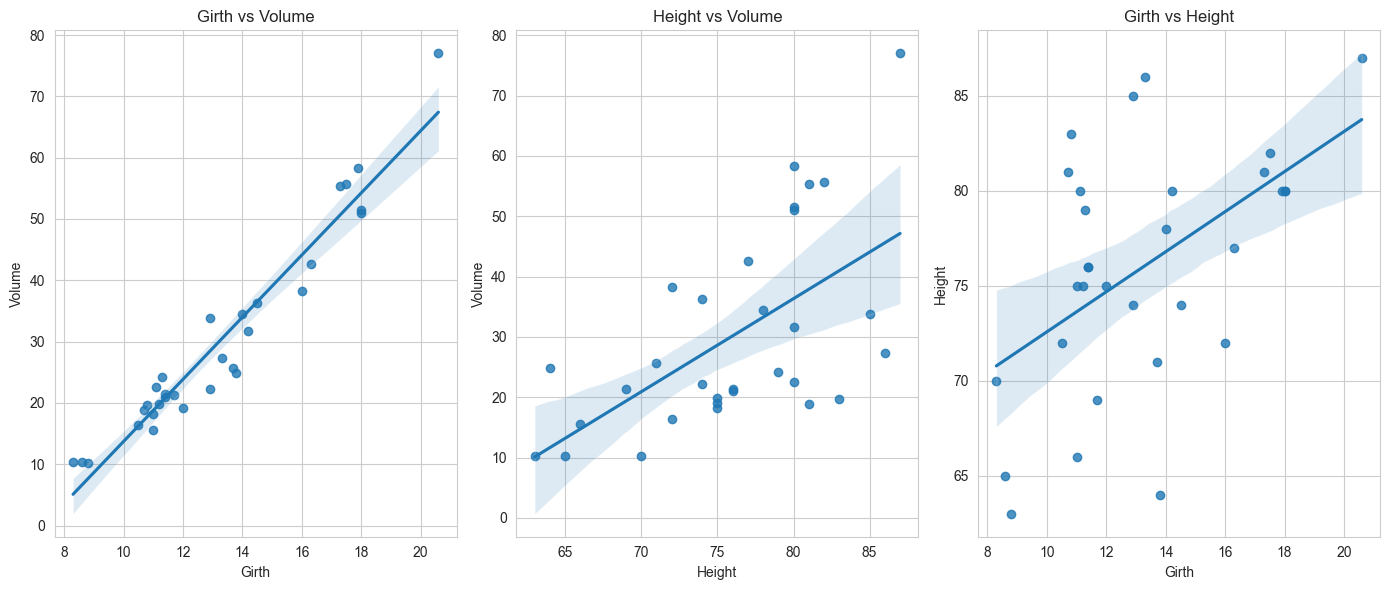

In [208]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.regplot(x='Girth', y='Volume', data=df)
plt.title('Girth vs Volume')

plt.subplot(1, 3, 2)
sns.regplot(x='Height', y='Volume', data=df)
plt.title('Height vs Volume')

plt.subplot(1, 3, 3)
sns.regplot(x='Girth', y='Height', data=df)
plt.title('Girth vs Height')

plt.tight_layout()
plt.show()


<a id="section6.2.3"></a>

### Heatmap
***

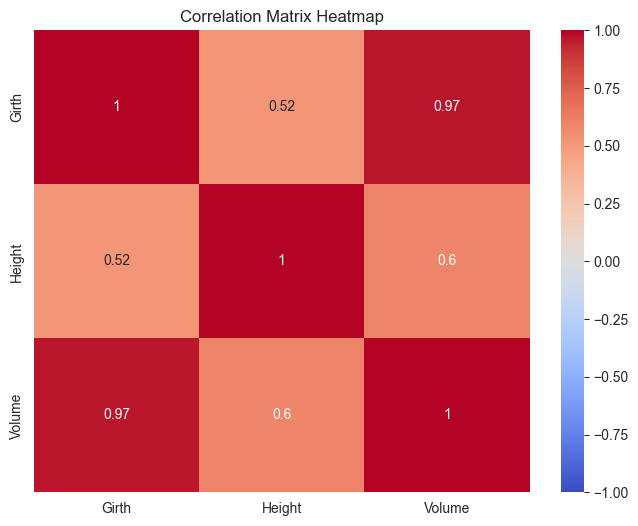

In [209]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


<a id="section6.3"></a>

## Models testing
***

<a id="section6.3.1"></a>

### Models and hyperparametres
***

In [138]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()
gboost_model = GradientBoostingRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()

In [142]:
linear_params = {}
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
tree_params = {'max_depth': [None, 10, 20],
               'min_samples_split': [2, 5, 10]}
forest_params = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}
gboost_params = {'n_estimators': [100, 200, 300],
                 'learning_rate': [0.01, 0.1, 0.5]}
svr_params = {'C': [0.1, 1.0, 10.0],
              'epsilon': [0.1, 0.2, 0.5]}
knn_params = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}

<a id="section6.3.2"></a>

### Fit models
***

**Code comment:**

Because we needed to test different features and models, it seemed efficient to combine separate models into a loop function.
Firstly, we created two dictionaries with independent features we are going to test and with models and hyperparameters which we defined earlier. After each loop, those metrics which we want to consider are added to a dictionary which we defined as well.


In [156]:
datasets = {
    'Girth+Height': df[['Girth', 'Height']],
    'Height': df[['Height']],
    'Girth': df[['Girth']]
}

models_params = {
    'Linear Regression': (LinearRegression(), linear_params),
    'Ridge Regression': (Ridge(), ridge_params),
    'Lasso Regression': (Lasso(), lasso_params),
    'Decision Tree Regression': (DecisionTreeRegressor(), tree_params),
    'Random Forest Regression': (RandomForestRegressor(), forest_params),
    'Gradient Boosting Regression': (GradientBoostingRegressor(), gboost_params),
    'SVR': (SVR(), svr_params),
    'k-NN Regression': (KNeighborsRegressor(), knn_params)
}

accuracy_results = []

for dataset_name, X in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for model_name, (model, params) in models_params.items():
        GS_model = GridSearchCV(estimator=model, 
                                param_grid=params,
                                scoring=["r2", 'neg_root_mean_squared_error'],
                                refit="r2",
                                cv=5,
                                verbose=4)
        
        GS_model.fit(X_train, y_train)

        y_train_pred = GS_model.predict(X_train)
        y_test_pred = GS_model.predict(X_test)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        best_estimator = GS_model.best_estimator_
        best_parameters = GS_model.best_params_

        accuracy_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Training MSE': mse_train,
            'Testing MSE': mse_test,
            'Training MAE': mae_train,
            'Testing MAE': mae_test,
            'Training R²': r2_train,
            'Testing R²': r2_test,
            'Best estimator': best_estimator,
            'Best parameters': best_parameters
        })

accuracy_df = pd.DataFrame(accuracy_results)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END  neg_root_mean_squared_error: (test=-1.774) r2: (test=0.897) total time=   0.0s
[CV 2/5] END  neg_root_mean_squared_error: (test=-7.158) r2: (test=0.859) total time=   0.0s
[CV 3/5] END  neg_root_mean_squared_error: (test=-4.114) r2: (test=0.920) total time=   0.0s
[CV 4/5] END  neg_root_mean_squared_error: (test=-5.180) r2: (test=0.949) total time=   0.0s
[CV 5/5] END  neg_root_mean_squared_error: (test=-5.561) r2: (test=0.844) total time=   0.0s
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END alpha=0.1; neg_root_mean_squared_error: (test=-1.795) r2: (test=0.894) total time=   0.0s
[CV 2/5] END alpha=0.1; neg_root_mean_squared_error: (test=-7.152) r2: (test=0.859) total time=   0.0s
[CV 3/5] END alpha=0.1; neg_root_mean_squared_error: (test=-4.112) r2: (test=0.920) total time=   0.0s
[CV 4/5] END alpha=0.1; neg_root_mean_squared_error: (test=-5.191) r2: (test=0.949) total time=   0.0s
[CV 

<a id="section6.3.3"></a>

### Evaluation
***

In [167]:
accuracy_df.head(25)

,Dataset,Model,Training MSE,Testing MSE,Training MAE,Testing MAE,Training R²,Testing R²,Best estimator,Best parameters
0,Girth+Height,Linear Regression,1.221957e+01,18.307080,2.773891e+00,3.605631,0.956853,0.914307,LinearRegression(),{}
1,Girth+Height,Ridge Regression,1.221965e+01,18.282110,2.774803e+00,3.602877,0.956853,0.914424,Ridge(alpha=0.1),{'alpha': 0.1}
2,Girth+Height,Lasso Regression,1.222064e+01,18.193015,2.777171e+00,3.595169,0.956850,0.914841,Lasso(alpha=0.1),{'alpha': 0.1}
3,Girth+Height,Decision Tree Regression,0.000000e+00,78.052000,0.000000e+00,6.680000,1.000000,0.634650,DecisionTreeRegressor(),"{'max_depth': None, 'min_samples_split': 2}"
4,Girth+Height,Random Forest Regression,2.114405e+01,38.175012,2.514757e+00,4.842085,0.925342,0.821308,"(DecisionTreeRegressor(max_depth=20, max_features=1.0, min_samples_split=5,\n ...","{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}"
5,Girth+Height,Gradient Boosting Regression,1.928831e-16,45.496838,1.191288e-08,5.309545,1.000000,0.787036,"([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n ...","{'learning_rate': 0.5, 'n_estimators': 300}"
6,Girth+Height,SVR,2.120017e+02,191.245095,1.000861e+01,10.373698,0.251435,0.104809,"SVR(C=10.0, epsilon=0.5)","{'C': 10.0, 'epsilon': 0.5}"
7,Girth+Height,k-NN Regression,0.000000e+00,21.040089,0.000000e+00,3.378301,1.000000,0.901514,"KNeighborsRegressor(n_neighbors=3, weights='distance')","{'n_neighbors': 3, 'weights': 'distance'}"
8,Height,Linear Regression,1.605491e+02,183.812323,1.027270e+01,12.709446,0.433111,0.139600,LinearRegression(),{}
9,Height,Ridge Regression,1.605610e+02,183.595709,1.024910e+01,12.707949,0.433069,0.140614,Ridge(alpha=10.0),{'alpha': 10.0}


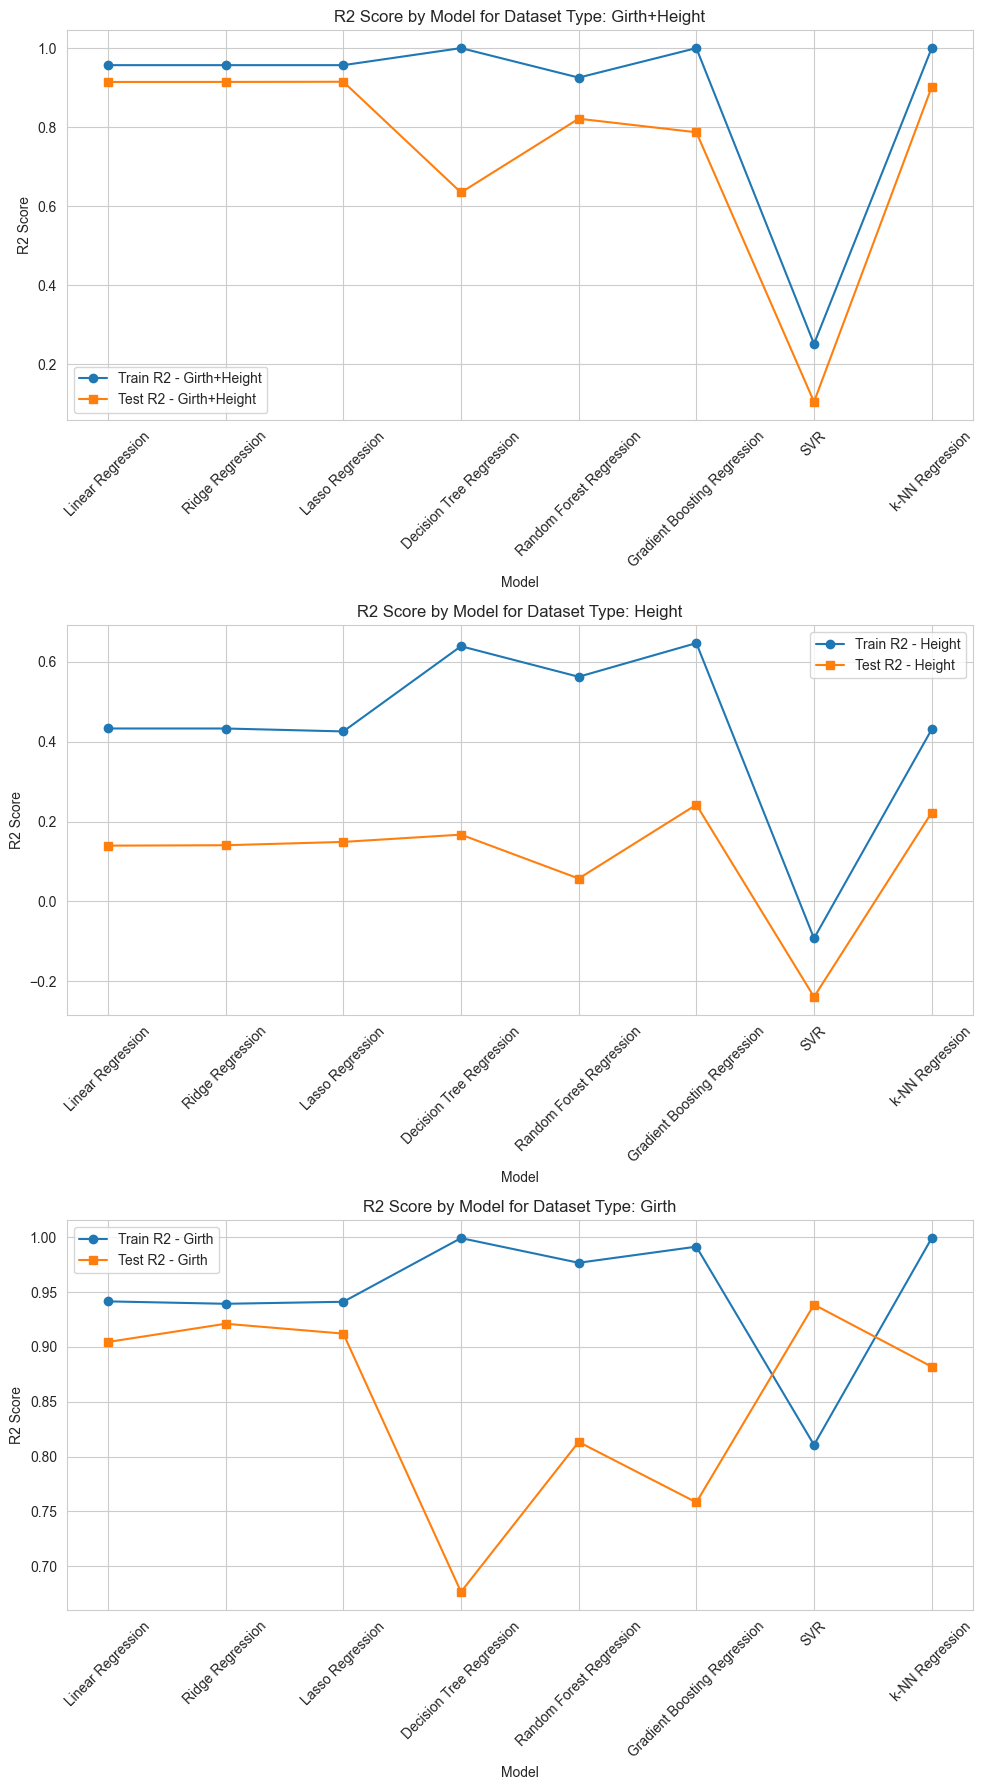

In [165]:
sns.set_style("whitegrid")

models = accuracy_df['Dataset'].unique()

fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(10, 6*len(models)))

for i, dataset_type in enumerate(models:
    df_subset = accuracy_df[accuracy_df['Dataset'] == dataset_type]
    
    axes[i].plot(df_subset['Model'], df_subset['Training R²'], marker='o', label=f'Train R2 - {dataset_type}')
    
    axes[i].plot(df_subset['Model'], df_subset['Testing R²'], marker='s', label=f'Test R2 - {dataset_type}')
    
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('R2 Score')
    axes[i].set_title(f'R2 Scores for Model {dataset_type}')
    axes[i].legend()
    
    axes[i].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.show()

<a id="section6.3.4"></a>

## Conclusion
***

Comparing 3 combinations of independent features models performed the best accuracy with "Girth" and "Girth+Height" for predicting "Volume".
However, the combination "Girth+Height" has shown less overall distance between training and testing R², which may indicate that the use of those features may prevent overfitting and inaccurate prediction in terms of new data.

Models such as **Linear Regression, Ridge Regression and Lasso Regression** performed approximately the same level of accuracy in training and testing sets, as well as an appropriate ratio between training and testing sets, which indicates that those models will perform similarly a new data. 

Tree-based models such as **Decision Tree and Random Forest** performed well in the training set but in testing in part they could perform with the same accuracy. It means models are overfitted.

Models which rely on distances such as **SVR and KNN** gave different results, which may be related to scaling issues, which is very important for SVR. 

Overall we can see that linear and vector-based models perform much more steadily than others, although they were not the best across all samples.

The best combination of features that may be used for prediction target "Volume" is "Grid" and "Grid+Height".

<a id="section7"></a>

# References
***

Sprinthall, R. C. (2011). Basic statistical analysis (9th ed.). Pearson Education.

John P. K. and Melvin L. M. (2011). Survival Analysis (Hypothesis Testing) pp. 201–242.

Derrick, B. Toher, D. White, P. (2017). "How to compare the means of two samples that include paired observations and independent observations: A companion to Derrick, Russ, Toher and White (2017)" (PDF). The Quantitative Methods for Psychology. 13 (2): 120–126.

Nikulin, M. S. (1996), A guide to chi-squared testing, New York: Wiley.

Fisher R. A. (1922). "On the Interpretation of χ2 from Contingency Tables, and the Calculation of P". Journal of the Royal Statistical Society. 85 (1): 87–94.

Pearson K. (1900). "On the criterion that a given system of deviations from the probable in the case of a correlated system of variables is such that it can be reasonably supposed to have arisen from random sampling". Philosophical Magazine. Series 5. 50 (302): 157–175.

Kendall, M. G. and Stuart, A. (1973) The Advanced Theory of Statistics, Volume 2: Inference and Relationship, Griffin.

##### Author
***

**Ilia Grishkin**

https://github.com/Ilia-Grishkin